In [ ]:
#########################################################################
###########------- Deep Learning  ------------#################
#########################################################################
# Capacitador: Julio César Bernal Fernández
# email: juliobf08@gmail.com
# Tema : Redes Neuronales Artificiales
# version: 1.0
#########################################################################

In [2]:
# Parte 1 - Pre procesado de datos
# Cómo importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

---
## **PARTE 0 - INSTALACIONES A NIVEL DE TENSORFLOW **
---

In [ ]:
# Instalar KerasClassifier
!pip uninstall tensorflow

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.11/dist-packages/tensorflow-2.18.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorflow/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 80, in main
    return command.main(cmd_args)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 100, in main
    return self._main(args)
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-pa

In [2]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninsta

In [3]:
!pip install keras==2.12.0

---
## **PARTE I - ENTENDIMIENTO Y TRATAMIENTO DE DATOS **
---

In [3]:
# Importar el data set
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
# Revisamos la dimension del dataset!
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Exited', ylabel='count'>

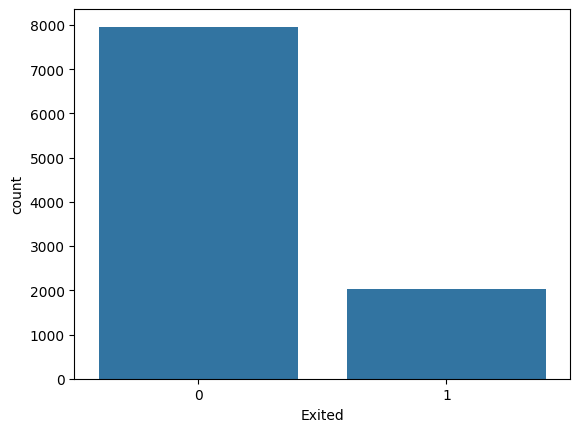

In [6]:
# Revisamos el target

sns.countplot(x='Exited',data=df)

In [7]:
# Separamos las columnas numericas y las categoricas
ColumnsCategoricas = ['Geography','Gender','HasCrCard','IsActiveMember','Exited']
ColumnsNumericas =   ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

# Columnas  categoricas One Hot, Label o target Encoder!

In [8]:
# Antes de hacer cualquier trabajo con los datos, vemos los valores nulos!
df.isnull().sum()/df.shape[0]*100

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [32]:
# Revisamos rápidamente los estadísiticos más importantes del dataset

df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [10]:
# Creamos 1 dataset de variables categoricas!
df_categoricas_01 = df[ColumnsCategoricas]

In [11]:
df_categoricas_01.head(10)

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0
5,Spain,Male,1,0,1
6,France,Male,1,1,0
7,Germany,Female,1,0,1
8,France,Male,0,1,0
9,France,Male,1,1,0


In [41]:
# Tratamiento de Variables Categoricas
# LabelEncoder

from sklearn.preprocessing import LabelEncoder
for c in df_categoricas_01[['Geography', 'Gender']]:
    print(str(c))
    le = LabelEncoder()   # 1 Instancio
    le.fit(df_categoricas_01[str(c)])
    df_categoricas_01[str(c)]=le.transform(df_categoricas_01[str(c)])

Geography
Gender


<ipython-input-41-6c7468dfb18a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categoricas_01[str(c)]=le.transform(df_categoricas_01[str(c)])
<ipython-input-41-6c7468dfb18a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categoricas_01[str(c)]=le.transform(df_categoricas_01[str(c)])


In [40]:
# Hemos utilizado label encoder!
df_categoricas_01.head(10)

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,0,0,1,1,1
1,2,0,0,1,0
2,0,0,1,0,1
3,0,0,0,0,0
4,2,0,1,1,0
5,2,1,1,0,1
6,0,1,1,1,0
7,1,0,1,0,1
8,0,1,0,1,0
9,0,1,1,1,0


In [34]:
# Concatenamos la informacion!
df2 = pd.concat([df[ColumnsNumericas],df_categoricas_01],axis=1)

In [ ]:
# Vemos los valores del dataset!

In [42]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,619,42,2,0.00,1,101348.88,0,0,1,1,1
1,608,41,1,83807.86,1,112542.58,2,0,0,1,0
2,502,42,8,159660.80,3,113931.57,0,0,1,0,1
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,2,0,1,1,0


In [43]:
# Separamos las covariables y el target!
X = df2.iloc[:,:10]
y = df2.Exited

In [44]:
# Yo tengo 2 set de datos!
print(y) # Target
print(X) # Covariables!

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64
      CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0             619   42       2       0.00              1        101348.88   
1             608   41       1   83807.86              1        112542.58   
2             502   42       8  159660.80              3        113931.57   
3             699   39       1       0.00              2         93826.63   
4             850   43       2  125510.82              1         79084.10   
...           ...  ...     ...        ...            ...              ...   
9995          771   39       5       0.00              2         96270.64   
9996          516   35      10   57369.61              1        101699.77   
9997          709   36       7       0.00              1         42085.58   
9998          772   42       3   75075.31              2         92888.52   
9

---
## **PARTE II - PARTICION MUESTRAL  Y ESCALAMIENTO DE DATOS **
---

In [45]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=111)

In [19]:
# Numero de Hijos :       [0   - 8]     hijos
# Ingreso de la persona : [830 - 20000] soles

In [46]:
# Importante Deep Learning !!!
# Escalado de variables

from sklearn.preprocessing import StandardScaler # Importan el modulo
sc_X = StandardScaler()                          # Definir la funcion
X_train = sc_X.fit_transform(X_train)            # Ajuste
X_test = sc_X.transform(X_test)                  # Aplicacion

In [47]:
X_train

array([[ 0.09114343, -0.57035851,  0.68775758, ..., -1.08575402,
         0.64791383, -1.02447862],
       [-1.0966718 , -0.57035851,  0.34126719, ..., -1.08575402,
         0.64791383,  0.97610627],
       [ 0.70054428, -0.57035851, -0.35171361, ..., -1.08575402,
        -1.54341512, -1.02447862],
       ...,
       [-0.16707727, -1.42940083, -1.04469441, ..., -1.08575402,
         0.64791383, -1.02447862],
       [-1.03469883,  1.24317527, -0.00522321, ...,  0.92101893,
         0.64791383,  0.97610627],
       [-1.71640148, -0.66580766, -0.69820401, ..., -1.08575402,
         0.64791383,  0.97610627]])

In [48]:
X_train.shape

(6700, 10)

---
## **PARTE III - CONSTRUCCION DE LA RED NEURONAL ARTIFICIAL **
---

In [49]:
# Importar Keras y librerías adicionales
import keras
from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

In [50]:
# Inicializar la RNA.
# Si la definimos como secuencia de capas es mucho mas facil despues trabajar con ellas.
classifier = Sequential() # Podria codificar aca las capas y demas pero lo hacemos una a una.

In [51]:
X_train.shape

(6700, 10)

In [58]:
# Añadir las capas de entrada y primera capa oculta
# Dense es un tipo de capa, la necesitamos codificar.
# units : Numero de neuronas
# kernel_initializer : Inicializacion de pesos.
# activation : Funcion de activacion que te ayuda a la ingenieria de variables!
# input_dim : Es el numero de variables o X o features.
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu", input_dim = 10)) # Primera capa oculta
#classifier.add(Dropout(p = 0.05))

In [59]:
# Añadir la segunda capa oculta
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))
#classifier.add(Dropout(p = 0.01)) # Regularización

In [60]:
# Añadir la capa de salida
# Solo necesitamos una unidad pues tenemos un resultado binario.
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
# Si tengo mas de 2 categorias , puedo mantener la funcion de activacion sigmoide? +1

In [63]:
# Compilar la RNA
# Podemos probar con distintos optimizadores
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [65]:
# Resumen de la estructura de la Red Neuronal!
classifier.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

---
## **PARTE IV - ENTRENAMIENTO DE LA RED NEURONAL ARTIFICIAL **
---

In [31]:
# Ajustamos la RNA al Conjunto de Entrenamiento
# batch_size : Numero de observaciones antes de actualizar los pesos/ tamaño del bloque a procesar.
# epochs     : Numero de iteracciones globales / Mas veces mas aprendizaje u overfitting.
history = classifier.fit(X_train,
                         y_train,
                         validation_split=0.33,
                         batch_size = 32,
                         epochs = 100)

Epoch 1/100
141/141 [==============================] - 2s 4ms/step - loss: 0.6485 - accuracy: 0.7992 - val_loss: 0.5630 - val_accuracy: 0.7916
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4747 - accuracy: 0.7992 - val_loss: 0.4466 - val_accuracy: 0.7916
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4333 - accuracy: 0.7992 - val_loss: 0.4396 - val_accuracy: 0.7916
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4287 - accuracy: 0.7992 - val_loss: 0.4365 - val_accuracy: 0.7916
Epoch 5/100
141/141 [==============================] - 1s 5ms/step - loss: 0.4261 - accuracy: 0.7992 - val_loss: 0.4348 - val_accuracy: 0.7916
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4246 - accuracy: 0.7992 - val_loss: 0.4336 - val_accuracy: 0.7916
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.7992 - val_loss: 0.4324 - val_accuracy: 0.7916

In [66]:
# Evaluar el modelo y calcular predicciones finales
y_pred_train  = classifier.predict(X_train)

210/210 [==============================] - 1s 1ms/step


In [67]:
y_pred_train


array([[0.49999994],
       [0.49999994],
       [0.49999994],
       ...,
       [0.49999994],
       [0.49999994],
       [0.49999994]], dtype=float32)

In [68]:
# Evaluar el modelo y calcular predicciones finales
y_pred_train  = classifier.predict(X_train)
y_pred_train = (y_pred_train>0.5)

y_pred_test  = classifier.predict(X_test)
y_pred_test = (y_pred_test>0.5)

104/104 [==============================] - 0s 2ms/step


In [69]:
y_pred_test

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

---
## **PARTE V - VALIDACION DE LA RED NEURONAL ARTIFICIAL **
---

In [70]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix,recall_score,f1_score,accuracy_score
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

recall_train = accuracy_score(y_train, y_pred_train)
recall_test = accuracy_score(y_test, y_pred_test)


print(cm_train)
print(cm_test)
print(recall_train)
print(recall_test)

[[5338    0]
 [1362    0]]
[[2625    0]
 [ 675    0]]
0.7967164179104478
0.7954545454545454


In [ ]:
# Tarea: Hallar y comparar los siguientes indicadores: Sensibilidad, Especificidad, Precision y F1-Score

In [71]:
# GRAFICANDO resultados
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


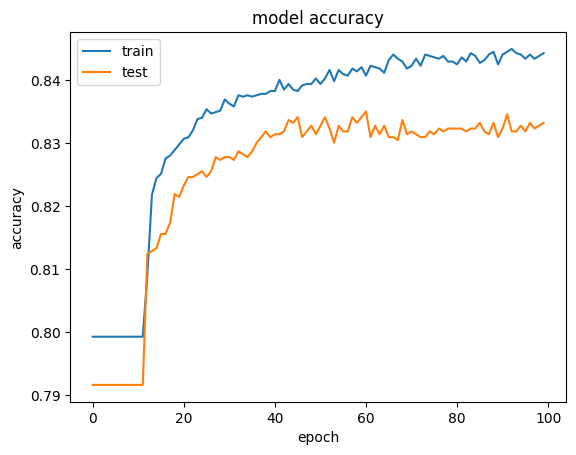

In [72]:
# Resumen del historial del accuracy!
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

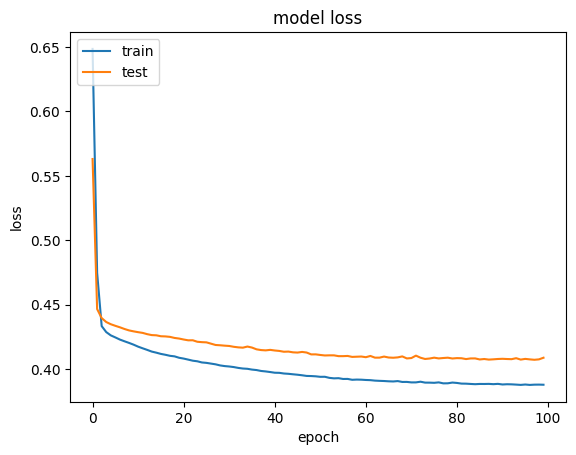

In [73]:
# Resumen del historial del error!
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
# Guardamos el modelo de red neuronal para usarlo cuando lo necesitemos!
classifier.save('rn_6_6_6_1')

In [78]:
# Leemos el modelos con todos los pesos de la red neuronal!
new_model = keras.models.load_model('rn_6_6_6_1')

In [79]:
# Mostramos la arquitectura del modelo!
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 66        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
 dense_5 (Dense)             (None, 6)                 12        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 176
Trainable params: 176
Non-trainable 

---
## **PARTE VI - MEJORAR Y TUNEAR LA RED NEURONAL ARTIFICIAL **
---

In [ ]:
# Evaluar, mejorar y Ajustar la RNA

In [ ]:
### Evaluar la **RNA**
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Construimos un clasificador

In [ ]:
def build_classifier():
  classifier = Sequential()
  classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu", input_dim = 10))
  classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))
  classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
  classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
  return classifier

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 100)
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, verbose = 1)

<ipython-input-51-e4683383a691>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 100)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   33.6s finished


In [ ]:
# Corroboramos si estamos ante un problema de Bias o Variance
mean = accuracies.mean()
variance = accuracies.std()

In [ ]:
# Validamos la media y desviacion estandar del accuracy!
print(mean)
print(variance)

0.7967164278030395
0.012084945604040184


In [ ]:
### Mejorar la RNA
#### Regularización de Dropout para evitar el *overfitting*

In [ ]:
### Ajustar la *RNA*
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV # sklearn.grid_search

In [ ]:
def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units = 16, kernel_initializer = "uniform",  activation = "relu", input_dim = 10))
  classifier.add(Dense(units = 16, kernel_initializer = "uniform",  activation = "relu"))
  classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
  classifier.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
  return classifier

In [ ]:
# Construimos el clasificador
classifier = KerasClassifier(build_fn = build_classifier)

<ipython-input-56-a3a453b6d88c>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier)


In [ ]:
# Hacemos el grid con los parámetros que queremos optimizar
parameters = {
    'batch_size' : [25,32],
    'nb_epoch' : [100, 250 , 500],
    'optimizer' : ['adam', 'rmsprop']
}

In [ ]:
# Ajustamos el Random GridSearch
grid_search = RandomizedSearchCV(classifier,
                                 parameters,
                                 scoring = 'accuracy',
                                 cv = 3)

In [ ]:
grid_search = grid_search.fit(X_train,y_train)


268/268 [==============================] - 1s 2ms/step - loss: 0.5097 - accuracy: 0.7967


In [ ]:
# Ajustamos el GridSearch Exhaustivo
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)
grid_search = grid_search.fit(X_train, y_train)

268/268 [==============================] - 1s 2ms/step - loss: 0.5205 - accuracy: 0.7954


In [ ]:
# Revisamos los mejores parametros!
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
print(best_parameters)
print(best_accuracy)

{'batch_size': 25, 'nb_epoch': 100, 'optimizer': 'adam'}
0.7967162083946574


In [ ]:
# FIN !!